In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Load the dataset
df = pd.read_csv('churn_clean.csv') 

# Display information and structure of the data
print(df.head())  
# Display info 
print(df[['Tenure', 'MonthlyCharge', 'Churn']].describe())
print(df[['Tenure', 'MonthlyCharge', 'Churn']].info())


   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [2]:
#C3


# Encoding categorical 'Churn' variable into 0 for no / 1 for yes

label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Scaling numeric variables 'Tenure' and 'MonthlyCharge'
scaler = StandardScaler()
df[['Tenure', 'MonthlyCharge']] = scaler.fit_transform(df[['Tenure', 'MonthlyCharge']])

# Displaying the new df
df_selected = df[['Tenure', 'MonthlyCharge', 'Churn']]
print(df_selected)

#Save data
df.to_csv('D209_data.csv', index=False)

        Tenure  MonthlyCharge  Churn
0    -1.048746      -0.003943      0
1    -1.262001       1.630326      1
2    -0.709940      -0.295225      0
3    -0.659524      -1.226521      0
4    -1.242551      -0.528086      1
...        ...            ...    ...
9995  1.273401      -0.294484      0
9996  1.002740       0.811726      0
9997  0.487513      -0.061729      0
9998  1.383018       1.863005      0
9999  1.090120       1.044672      0

[10000 rows x 3 columns]


In [3]:
#C4


# Splitting the data into training and test
X = df[['Tenure', 'MonthlyCharge']]  
y = df['Churn']  

# Use 80% of the data for training and 20% for testing  (Scikit, n.d.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating new df for training and test 
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Saving training and test data
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


Accuracy: 0.8345
Precision: 0.7290322580645161
Recall: 0.6231617647058824
F1 Score: 0.6719524281466799


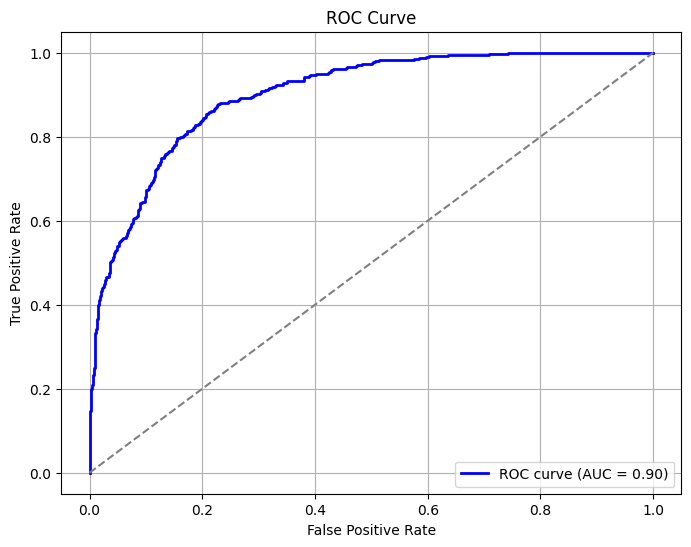

In [4]:
#D3

# Applying Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predicting on test data
y_pred = naive_bayes.predict(X_test)

# Model Evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")



# Get predicted probabilities for positive class (churn)
y_prob = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate ROC curve (Scikit, n.d.)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
